In [183]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' column as the index
df.set_index('UTC', inplace=True)

# Display the first and last few rows of the DataFrame
print(df.head())
print(df.tail())

# Get a summary of the DataFrame
df.info()

                                 pID            Prd   PrdNorm         Irr
UTC                                                                      
2023-04-13 11:00:00+00:00  Bisceglie  780930.530000  0.791461  917.055833
2023-04-13 12:00:00+00:00  Bisceglie  743441.672500  0.753484  872.392333
2023-04-13 13:00:00+00:00  Bisceglie  578979.020833  0.586780  670.299333
2023-04-13 14:00:00+00:00  Bisceglie  415189.573333  0.420821  478.413500
2023-04-13 15:00:00+00:00  Bisceglie  530802.923333  0.537957  605.063667
                             pID         Prd  PrdNorm       Irr
UTC                                                            
2024-06-19 19:00:00+00:00  Celso  27114.7325  0.00452  5.538500
2024-06-19 20:00:00+00:00  Celso      0.0000  0.00000  0.338333
2024-06-19 21:00:00+00:00  Celso      0.0000  0.00000  0.320833
2024-06-19 22:00:00+00:00  Celso      0.0000  0.00000  0.307000
2024-06-19 23:00:00+00:00  Celso      0.0000  0.00000  0.294500
<class 'pandas.core.frame.DataFram

In [184]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


In [185]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = ['Prd', 'PrdNorm', 'Irr']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no more missing values
print(df.isnull().sum())

pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64
pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64


In [186]:
# Verify data types
print(df.dtypes)

# Ensure all data types are as expected, for example, prd and Irr should be float
df['Prd'] = df['Prd'].astype(float)
df['Irr'] = df['Irr'].astype(float)
df['PrdNorm'] = df['PrdNorm'].astype(float)

# Verify the changes
print(df.dtypes)


pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object
pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object


In [187]:
# Verify the normalization
print(df['PrdNorm'].describe())

count    56007.000000
mean         0.162691
std          0.245157
min          0.000000
25%          0.000000
50%          0.000486
75%          0.290100
max          0.898216
Name: PrdNorm, dtype: float64


In [188]:
# Resample the data to daily production and irradiation
daily_df = df.resample('D').sum()

# Display the first few rows of the resampled DataFrame
print(daily_df.head())


                                                                         pID  \
UTC                                                                            
2023-04-13 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-14 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-15 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-16 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-17 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   

                                    Prd   PrdNorm          Irr  
UTC                                                             
2023-04-13 00:00:00+00:00  2.000873e+07  7.483768  8745.116870  
2023-04-14 00:00:00+00:00  2.737290e+07  6.198623  7305.307037  
2023-04-15 00:00:00+00:00  2.239684e+07  8.372315  9376.017170  
2023-04-16 00:00:00+00:00  1.527575e+07  6.041580  6571.661265  
2023-04-17 00:00:00+00:00  1.045721e+07  3.385164

In [189]:
# Generate descriptive statistics
daily_stats = daily_df.describe()
print(daily_stats)


                Prd     PrdNorm           Irr
count  4.340000e+02  434.000000    434.000000
mean   6.049409e+07   20.995030  25190.618963
std    3.167005e+07    9.611651  11863.851007
min    0.000000e+00    0.000000      0.000000
25%    3.726667e+07   12.985842  15604.705024
50%    5.625551e+07   20.953532  24682.439795
75%    7.993752e+07   27.567742  32963.240674
max    1.696259e+08   50.245950  61883.108917


In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


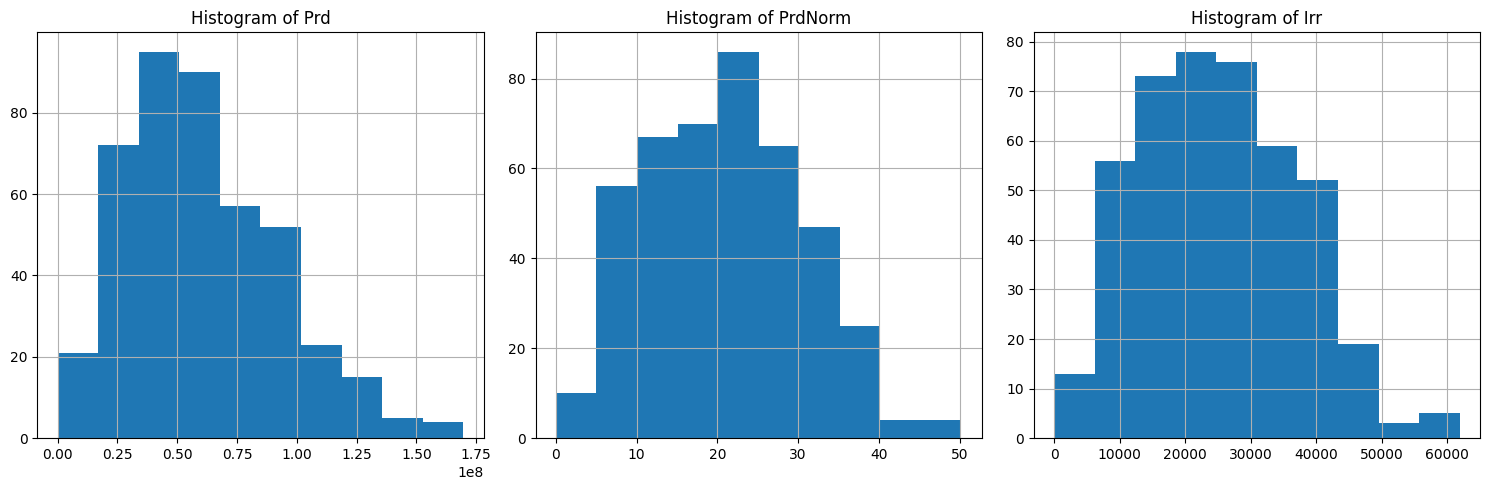

In [191]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
daily_df['Prd'].hist(ax=axes[0])
axes[0].set_title('Histogram of Prd')
daily_df['PrdNorm'].hist(ax=axes[1])
axes[1].set_title('Histogram of PrdNorm')
daily_df['Irr'].hist(ax=axes[2])
axes[2].set_title('Histogram of Irr')
plt.tight_layout()
plt.show()

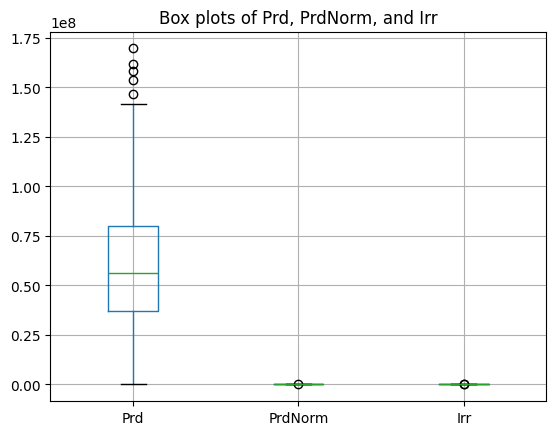

In [192]:
daily_df.boxplot(column=['Prd', 'PrdNorm', 'Irr'])
plt.title('Box plots of Prd, PrdNorm, and Irr')
plt.show()

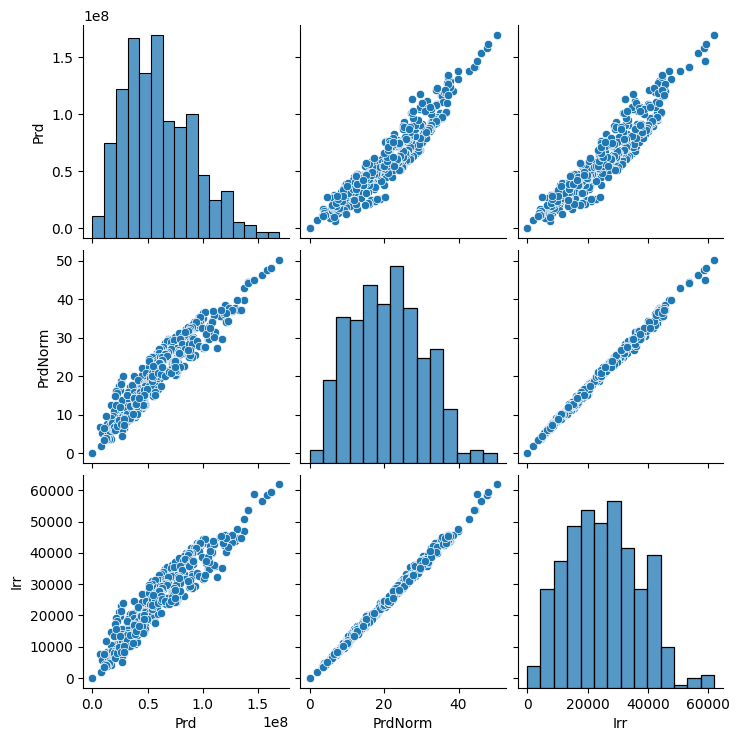

In [193]:
# Bivariate Analysis
sns.pairplot(daily_df[['Prd', 'PrdNorm', 'Irr']])
plt.show()

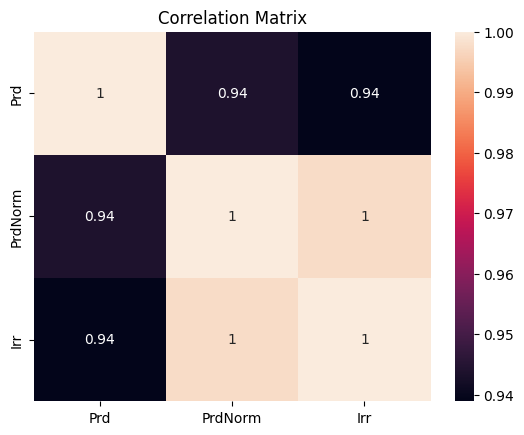

In [194]:
# Correlation Matrix
corr_matrix = daily_df[['Prd', 'PrdNorm', 'Irr']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

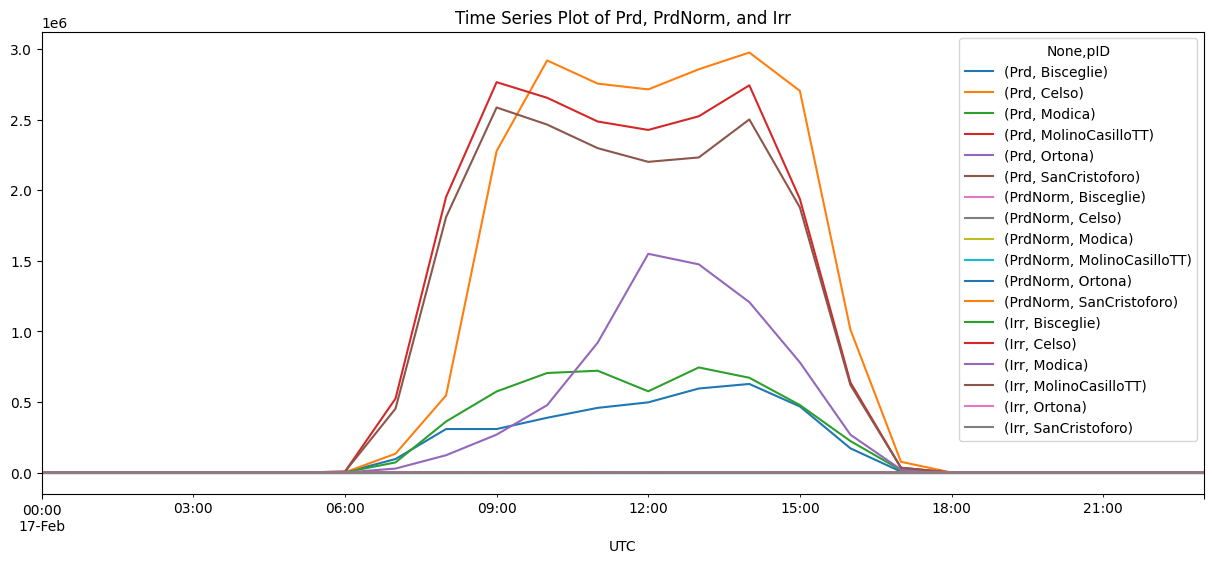

In [195]:
# Time Series Analysis
df.set_index('pID', append=True).unstack(level=1).sort_index().loc['2024-02-17'][['Prd', 'PrdNorm', 'Irr']].plot(figsize=(15, 6))

plt.title('Time Series Plot of Prd, PrdNorm, and Irr')
plt.show()


In [196]:
df.set_index('pID', append=True).unstack(level=1)

Prd                                       \
pID                            Bisceglie       Celso   Modica MolinoCasilloTT   
UTC                                                                             
2023-04-13 11:00:00+00:00  780930.530000         NaN      NaN    3.167157e+06   
2023-04-13 12:00:00+00:00  743441.672500         NaN      NaN    3.112100e+06   
2023-04-13 13:00:00+00:00  578979.020833         NaN      NaN    3.126391e+06   
2023-04-13 14:00:00+00:00  415189.573333         NaN      NaN    2.061898e+06   
2023-04-13 15:00:00+00:00  530802.923333         NaN      NaN    2.355887e+06   
...                                  ...         ...      ...             ...   
2024-06-19 19:00:00+00:00    2787.246667  27114.7325  1416.39    1.169771e+04   
2024-06-19 20:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 21:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 22:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 23:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   

                                                        PrdNorm           \
pID                              Ortona SanCristoforo Bisceglie    Celso   
UTC                                                                        
2023-04-13 11:00:00+00:00      0.000000           NaN  0.791461      NaN   
2023-04-13 12:00:00+00:00      0.000000           NaN  0.753484      NaN   
2023-04-13 13:00:00+00:00      0.000000           NaN  0.586780      NaN   
2023-04-13 14:00:00+00:00      0.000000           NaN  0.420821      NaN   
2023-04-13 15:00:00+00:00      0.000000           NaN  0.537957      NaN   
...                                 ...           ...       ...      ...   
2024-06-19 19:00:00+00:00  13733.264167  15361.586667  0.002817  0.00452   
2024-06-19 20:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 21:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 22:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 23:00:00+00:00      0.000000      0.000000  0.000000  0.00000   

                                                                             \
pID                          Modica MolinoCasilloTT    Ortona SanCristoforo   
UTC                                                                           
2023-04-13 11:00:00+00:00       NaN        0.712887  0.000000           NaN   
2023-04-13 12:00:00+00:00       NaN        0.700477  0.000000           NaN   
2023-04-13 13:00:00+00:00       NaN        0.703715  0.000000           NaN   
2023-04-13 14:00:00+00:00       NaN        0.464113  0.000000           NaN   
2023-04-13 15:00:00+00:00       NaN        0.530251  0.000000           NaN   
...                             ...             ...       ...           ...   
2024-06-19 19:00:00+00:00  0.001419        0.002632  0.006091      0.003179   
2024-06-19 20:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 21:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 22:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 23:00:00+00:00  0.000000        0.000000  0.000000      0.000000   

                                  Irr                                      \
pID                         Bisceglie     Celso    Modica MolinoCasilloTT   
UTC                                                                         
2023-04-13 11:00:00+00:00  917.055833       NaN       NaN      809.252296   
2023-04-13 12:00:00+00:00  872.392333       NaN       NaN      798.701926   
2023-04-13 13:00:00+00:00  670.299333       NaN       NaN      821.734370   
2023-04-13 14:00:00+00:00  478.413500       NaN       NaN      520.583704   
2023-04-13 15:00:00+00:00  605.063667       NaN       NaN      614.145926   
...                               ...       ...       ...             ...   
2024-06-19 19:00:00+00:00    2.980667

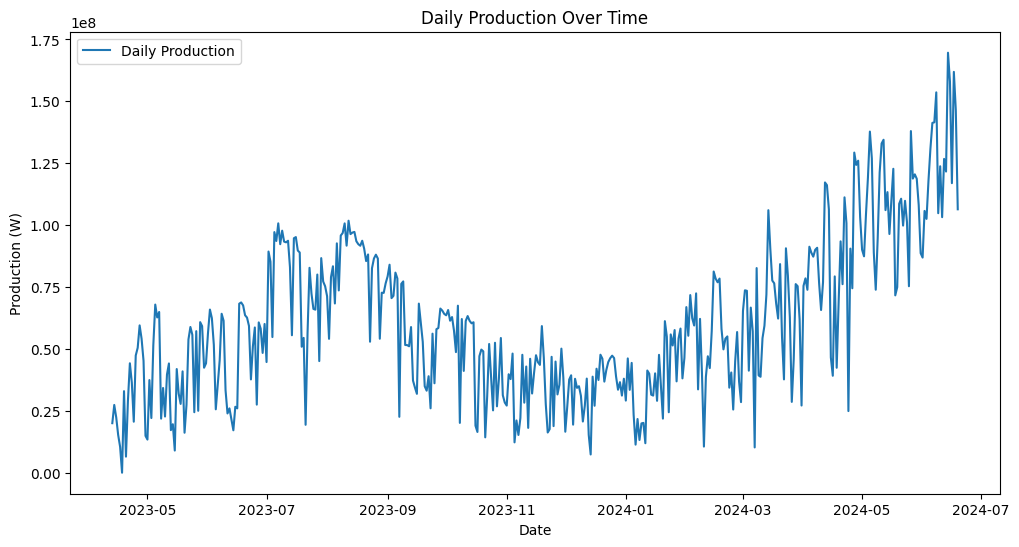

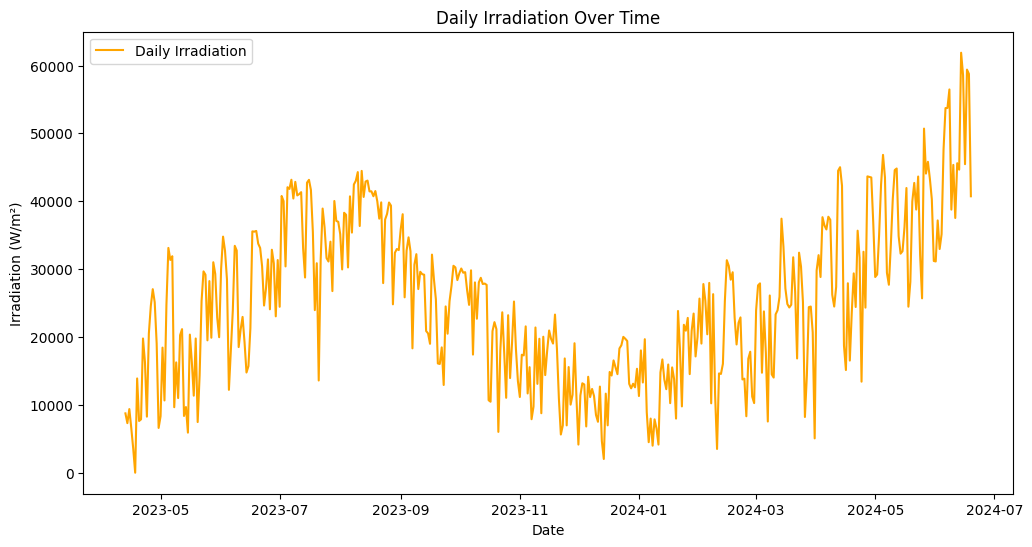

In [197]:
import matplotlib.pyplot as plt

# Plot daily production
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Prd'], label='Daily Production')
plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (W)')
plt.legend()
plt.show()

# Plot daily irradiation
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Irr'], label='Daily Irradiation', color='orange')
plt.title('Daily Irradiation Over Time')
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m²)')
plt.legend()
plt.show()


In [198]:
import numpy as np

# Creating cyclical features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

# Transforming the features using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# Dropping the original columns used for transformation
df.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)


In [199]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df[['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']]
y = df['PrdNorm']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
X_train.shape

(44805, 9)

In [214]:
y_train.shape

(44805,)

In [215]:
df

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2023-04-13 11:00:00+00:00,Bisceglie,780930.530000,0.791461,917.055833,2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 12:00:00+00:00,Bisceglie,743441.672500,0.753484,872.392333,1.224647e-16,-1.000000,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 13:00:00+00:00,Bisceglie,578979.020833,0.586780,670.299333,-2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 14:00:00+00:00,Bisceglie,415189.573333,0.420821,478.413500,-5.000000e-01,-0.866025,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 15:00:00+00:00,Bisceglie,530802.923333,0.537957,605.063667,-7.071068e-01,-0.707107,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00+00:00,Celso,27114.732500,0.004520,5.538500,-9.659258e-01,0.258819,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 20:00:00+00:00,Celso,0.000000,0.000000,0.338333,-8.660254e-01,0.500000,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 21:00:00+00:00,Celso,0.000000,0.000000,0.320833,-7.071068e-01,0.707107,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [216]:
df.loc['2024-06-19 23:00:00+00:00']

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2024-06-19 23:00:00+00:00,Bisceglie,0.0,0.0,0.016833,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Modica,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Ortona,0.0,0.0,0.541000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,SanCristoforo,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,MolinoCasilloTT,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Celso,0.0,0.0,0.294500,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [200]:
from sklearn.metrics import mean_absolute_error
import numpy as np


In [201]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)

index = y_test>0.2

mape_rf = mean_absolute_percentage_error(y_test[index], y_pred_rf[index])
print(f"Random Forest - MAE: {mae_rf}, MAPE: {mape_rf}")

print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")


Random Forest - MAE: 0.008419122559803063, MAPE: 5.251368852770586
Random Forest - RMSE: 0.019134144225154307, R²: 0.993951071381657


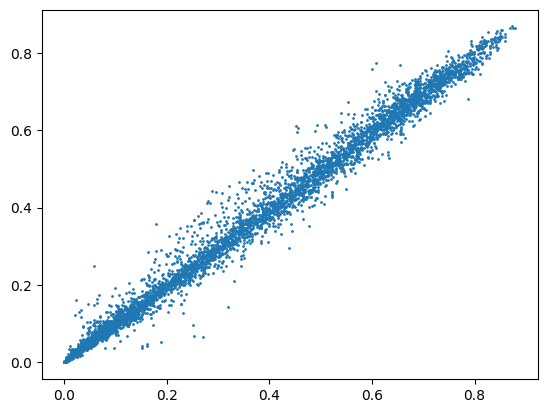

In [227]:
import matplotlib.pyplot as plt
 
 
plt.scatter(y_test, y_pred_rf, s=1)
 
plt.show()
 

In [219]:
y_pred_rf.max()

0.8678254219227065

In [203]:
import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)


# XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost - MAE: {mae_xgb}, MAPE: {mape_xgb}")

print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}")


XGBoost - MAE: 0.008378877107163696, MAPE: inf
XGBoost - RMSE: 0.018435691454507883, R²: 0.994384618908613


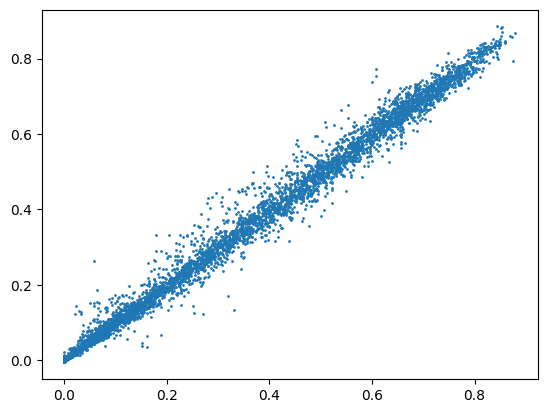

In [226]:
import matplotlib.pyplot as plt
 
 
plt.scatter(y_test, y_pred_xgb, s=1)

 
plt.show()
 

In [204]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Support Vector Regressor
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print(f"SVR - MAE: {mae_svr}, MAPE: {mape_svr}")

print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}")


SVR - MAE: 0.07396383233621392, MAPE: inf
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855


In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
snn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
snn_model.compile(optimizer='adam', loss='mse')

# Train the model
snn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_snn = snn_model.predict(X_test).flatten()

# Evaluation
mse_snn = mean_squared_error(y_test, y_pred_snn)
rmse_snn = mse_snn ** 0.5
r2_snn = r2_score(y_test, y_pred_snn)

# Standard Neural Network
mae_snn = mean_absolute_error(y_test, y_pred_snn)
mape_snn = mean_absolute_percentage_error(y_test, y_pred_snn)
print(f"SNN - MAE: {mae_snn}, MAPE: {mape_snn}")


print(f"SNN - RMSE: {rmse_snn}, R²: {r2_snn}")


Epoch 1/50
1121/1121 [==============================] - 1s 552us/step - loss: 2.8696 - val_loss: 0.0016
Epoch 2/50
1121/1121 [==============================] - 1s 498us/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/50
1121/1121 [==============================] - 1s 501us/step - loss: 0.1419 - val_loss: 0.0336
Epoch 4/50
1121/1121 [==============================] - 1s 564us/step - loss: 0.0053 - val_loss: 0.0302
Epoch 5/50
1121/1121 [==============================] - 1s 614us/step - loss: 0.8526 - val_loss: 0.0024
Epoch 6/50
1121/1121 [==============================] - 1s 551us/step - loss: 0.0017 - val_loss: 0.0055
Epoch 7/50
1121/1121 [==============================] - 1s 531us/step - loss: 0.1255 - val_loss: 0.0010
Epoch 8/50
1121/1121 [==============================] - 1s 505us/step - loss: 0.1936 - val_loss: 0.0028
Epoch 9/50
1121/1121 [==============================] - 1s 504us/step - loss: 0.0023 - val_loss: 0.0016
Epoch 10/50
1121/1121 [==============================] - 1s 583u

In [206]:
from tensorflow.keras.layers import SimpleRNN

# Reshape the data for RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the model
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dense(1)
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='mse')

# Train the model
rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

# Evaluation
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = mse_rnn ** 0.5
r2_rnn = r2_score(y_test, y_pred_rnn)

# Recurrent Neural Network
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
mape_rnn = mean_absolute_percentage_error(y_test, y_pred_rnn)
print(f"RNN - MAE: {mae_rnn}, MAPE: {mape_rnn}")

print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}")


Epoch 1/50
1121/1121 [==============================] - 1s 677us/step - loss: 44.2512 - val_loss: 0.0019
Epoch 2/50
1121/1121 [==============================] - 1s 627us/step - loss: 0.0020 - val_loss: 0.0014
Epoch 3/50
1121/1121 [==============================] - 1s 612us/step - loss: 0.0019 - val_loss: 0.0026
Epoch 4/50
1121/1121 [==============================] - 1s 742us/step - loss: 0.0033 - val_loss: 0.0018
Epoch 5/50
1121/1121 [==============================] - 1s 663us/step - loss: 0.0021 - val_loss: 9.3248e-04
Epoch 6/50
1121/1121 [==============================] - 1s 601us/step - loss: 0.0042 - val_loss: 0.0213
Epoch 7/50
1121/1121 [==============================] - 1s 598us/step - loss: 0.0384 - val_loss: 0.0169
Epoch 8/50
1121/1121 [==============================] - 1s 663us/step - loss: 0.0466 - val_loss: 0.0116
Epoch 9/50
1121/1121 [==============================] - 1s 600us/step - loss: 0.0235 - val_loss: 0.0962
Epoch 10/50
1121/1121 [==============================] - 1s

In [207]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape the data for CNN
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Initialize the model
cnn_model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()

# Evaluation
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = mse_cnn ** 0.5
r2_cnn = r2_score(y_test, y_pred_cnn)

# Convolutional Neural Network
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mape_cnn = mean_absolute_percentage_error(y_test, y_pred_cnn)
print(f"CNN - MAE: {mae_cnn}, MAPE: {mape_cnn}")

print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}")


Epoch 1/50
1121/1121 [==============================] - 1s 705us/step - loss: 0.1640 - val_loss: 0.0769
Epoch 2/50
1121/1121 [==============================] - 1s 623us/step - loss: 0.1811 - val_loss: 0.0039
Epoch 3/50
1121/1121 [==============================] - 1s 584us/step - loss: 0.0110 - val_loss: 0.0135
Epoch 4/50
1121/1121 [==============================] - 1s 579us/step - loss: 0.1859 - val_loss: 0.0027
Epoch 5/50
1121/1121 [==============================] - 1s 576us/step - loss: 0.0013 - val_loss: 5.1677e-04
Epoch 6/50
1121/1121 [==============================] - 1s 633us/step - loss: 0.0070 - val_loss: 4.9782e-04
Epoch 7/50
1121/1121 [==============================] - 1s 578us/step - loss: 0.0646 - val_loss: 0.0013
Epoch 8/50
1121/1121 [==============================] - 1s 580us/step - loss: 0.0172 - val_loss: 0.0021
Epoch 9/50
1121/1121 [==============================] - 1s 576us/step - loss: 0.0253 - val_loss: 0.0041
Epoch 10/50
1121/1121 [==============================] -

In [208]:
model_performance = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'SVR', 'SNN', 'RNN', 'CNN'],
    'RMSE': [rmse_rf, rmse_xgb, rmse_svr, rmse_snn, rmse_rnn, rmse_cnn],
    'R2': [r2_rf, r2_xgb, r2_svr, r2_snn, r2_rnn, r2_cnn],
    'nMBE': [nMBE_rf, nMBE_xgb, nMBE_svr, nMBE_snn, nMBE_rnn, nMBE_cnn],
    'nRMSE': [nRMSE_rf, nRMSE_xgb, nRMSE_svr, nRMSE_snn, nRMSE_rnn, nRMSE_cnn],
    'MAE': [mae_rf, mae_xgb, mae_svr, mae_snn, mae_rnn, mae_cnn],
    'MAPE': [mape_rf, mape_xgb, mape_svr, mape_snn, mape_rnn, mape_cnn]
})
print(model_performance)


           Model      RMSE        R2      nMBE     nRMSE       MAE  MAPE
0  Random Forest  0.019134  0.993951 -0.002318  0.052733  0.008419   inf
1        XGBoost  0.018436  0.994385 -0.001388  0.042109  0.008379   inf
2            SVR  0.080089  0.894025  0.215804  0.343331  0.073964   inf
3            SNN  0.021470  0.992384 -0.010167  0.058499  0.010188   inf
4            RNN  0.059092  0.942308  0.007735  0.066207  0.033401   inf
5            CNN  0.022831  0.991388  0.071469  0.095503  0.010491   inf


In [209]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Recalculating metrics with the corrected MAPE
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    return rmse, r2, mae, mape



# Example for Random Forest
rmse_rf, r2_rf, mae_rf, mape_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}, MAE: {mae_rf}, MAPE: {mape_rf}")

# Repeat the above for other models
# XGBoost
rmse_xgb, r2_xgb, mae_xgb, mape_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}, MAE: {mae_xgb}, MAPE: {mape_xgb}")

# SVR
rmse_svr, r2_svr, mae_svr, mape_svr = evaluate_model(y_test, y_pred_svr)
print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}, MAE: {mae_svr}, MAPE: {mape_svr}")

# SNN
rmse_snn, r2_snn, mae_snn, mape_snn = evaluate_model(y_test, y_pred_snn)
print(f"SNN - RMSE: {rmse_snn}, R²: {r2_snn}, MAE: {mae_snn}, MAPE: {mape_snn}")

# RNN
rmse_rnn, r2_rnn, mae_rnn, mape_rnn = evaluate_model(y_test, y_pred_rnn)
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MAE: {mae_rnn}, MAPE: {mape_rnn}")

# CNN
rmse_cnn, r2_cnn, mae_cnn, mape_cnn = evaluate_model(y_test, y_pred_cnn)
print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}, MAE: {mae_cnn}, MAPE: {mape_cnn}")


Random Forest - RMSE: 0.019134144225154307, R²: 0.993951071381657, MAE: 0.008419122559803063, MAPE: 51.07847106271427
XGBoost - RMSE: 0.018435691454507883, R²: 0.994384618908613, MAE: 0.008378877107163696, MAPE: 843.9269030580263
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855, MAE: 0.07396383233621392, MAPE: 400236.7997501002
SNN - RMSE: 0.021469980254015374, R²: 0.9923840573814485, MAE: 0.010187718352192062, MAPE: 688.8018565447146
RNN - RMSE: 0.05909180482524383, R²: 0.9423080946063005, MAE: 0.03340100739323482, MAPE: 7460.326309965465
CNN - RMSE: 0.022830601953686788, R²: 0.9913881769471506, MAE: 0.010490633356953221, MAPE: 1706.5181284787204


In [210]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    y_true, y_pred = y_true[non_zero_mask], y_pred[non_zero_mask]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluate models again
rmse_rf, r2_rf, mae_rf, mape_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}, MAE: {mae_rf}, MAPE: {mape_rf}")

# Repeat for other models
# XGBoost
rmse_xgb, r2_xgb, mae_xgb, mape_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R²: {r2_xgb}, MAE: {mae_xgb}, MAPE: {mape_xgb}")

# SVR
rmse_svr, r2_svr, mae_svr, mape_svr = evaluate_model(y_test, y_pred_svr)
print(f"SVR - RMSE: {rmse_svr}, R²: {r2_svr}, MAE: {mae_svr}, MAPE: {mape_svr}")

# SNN
rmse_snn, r2_snn, mae_snn, mape_snn = evaluate_model(y_test, y_pred_snn)
print(f"SNN - RMSE: {rmse_snn}, R²: {r2_snn}, MAE: {mae_snn}, MAPE: {mape_snn}")

# RNN
rmse_rnn, r2_rnn, mae_rnn, mape_rnn = evaluate_model(y_test, y_pred_rnn)
print(f"RNN - RMSE: {rmse_rnn}, R²: {r2_rnn}, MAE: {mae_rnn}, MAPE: {mape_rnn}")

# CNN
rmse_cnn, r2_cnn, mae_cnn, mape_cnn = evaluate_model(y_test, y_pred_cnn)
print(f"CNN - RMSE: {rmse_cnn}, R²: {r2_cnn}, MAE: {mae_cnn}, MAPE: {mape_cnn}")


Random Forest - RMSE: 0.019134144225154307, R²: 0.993951071381657, MAE: 0.008419122559803063, MAPE: 51.07847106271427
XGBoost - RMSE: 0.018435691454507883, R²: 0.994384618908613, MAE: 0.008378877107163696, MAPE: 843.9269030580263
SVR - RMSE: 0.08008882340109325, R²: 0.8940248109348855, MAE: 0.07396383233621392, MAPE: 400236.7997501002
SNN - RMSE: 0.021469980254015374, R²: 0.9923840573814485, MAE: 0.010187718352192062, MAPE: 688.8018565447146
RNN - RMSE: 0.05909180482524383, R²: 0.9423080946063005, MAE: 0.03340100739323482, MAPE: 7460.326309965465
CNN - RMSE: 0.022830601953686788, R²: 0.9913881769471506, MAE: 0.010490633356953221, MAPE: 1706.5181284787204


In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target
X = daily_df[['PrdNorm', 'Irr']]
y = daily_df['Prd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [86]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [87]:
from sklearn.svm import SVR

# Train SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train)

# Predict
y_pred_svr = svr.predict(X_test_scaled)

# Evaluate
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [88]:
def nMBE(y_true, y_pred):
    return np.mean(y_pred - y_true) / np.mean(y_true) * 100

def nRMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_pred - y_true)**2)) / np.mean(y_true) * 100

nMBE_rf = nMBE(y_test, y_pred_rf)
nRMSE_rf = nRMSE(y_test, y_pred_rf)

nMBE_xgb = nMBE(y_test, y_pred_xgb)
nRMSE_xgb = nRMSE(y_test, y_pred_xgb)

nMBE_svr = nMBE(y_test, y_pred_svr)
nRMSE_svr = nRMSE(y_test, y_pred_svr)


In [89]:
results = {
    'Model': ['Random Forest', 'XGBoost', 'SVR'],
    'MSE': [mse_rf, mse_xgb, mse_svr],
    'RMSE': [rmse_rf, rmse_xgb, rmse_svr],
    'R2': [r2_rf, r2_xgb, r2_svr],
    'nMBE': [nMBE_rf, nMBE_xgb, nMBE_svr],
    'nRMSE': [nRMSE_rf, nRMSE_xgb, nRMSE_svr]
}

results_df = pd.DataFrame(results)
print(results_df)


           Model           MSE          RMSE        R2       nMBE      nRMSE
0  Random Forest  1.205430e+14  1.097921e+07  0.889185   1.363296  16.389501
1        XGBoost  1.546510e+14  1.243587e+07  0.857830   1.812313  18.563976
2            SVR  1.230285e+15  3.507542e+07 -0.130998 -17.819834  52.359745


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten

# Standard Neural Network (SNN)
snn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

snn.compile(optimizer='adam', loss='mse', metrics=['mae'])
snn.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict
y_pred_snn = snn.predict(X_test_scaled).flatten()

# Evaluate
mse_snn = mean_squared_error(y_test, y_pred_snn)
rmse_snn = np.sqrt(mse_snn)
r2_snn = r2_score(y_test, y_pred_snn)
nMBE_snn = nMBE(y_test, y_pred_snn)
nRMSE_snn = nRMSE(y_test, y_pred_snn)

print(f"SNN - MSE: {mse_snn}, RMSE: {rmse_snn}, R2: {r2_snn}, nMBE: {nMBE_snn}, nRMSE: {nRMSE_snn}")


Epoch 1/50
9/9 [==============================] - 0s 9ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 4449449216573440.0000 - mae: 58931660.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 4/50
9/9 [==============================] - 0s 2ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 4449448679702528.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 4449448679702528.0000 - mae: 58931664.0000 - val_loss: 435686394875084

In [91]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout

# Reshape the data for CNN
X_train_cnn = np.expand_dims(X_train_scaled, axis=2)
X_test_cnn = np.expand_dims(X_test_scaled, axis=2)

# CNN Model
cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict
y_pred_cnn = cnn.predict(X_test_cnn).flatten()

# Evaluate
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)
nMBE_cnn = nMBE(y_test, y_pred_cnn)
nRMSE_cnn = nRMSE(y_test, y_pred_cnn)

print(f"CNN - MSE: {mse_cnn}, RMSE: {rmse_cnn}, R2: {r2_cnn}, nMBE: {nMBE_cnn}, nRMSE: {nRMSE_cnn}")


Epoch 1/50
9/9 [==============================] - 0s 9ms/step - loss: 4449449216573440.0000 - mae: 58931668.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 4449449216573440.0000 - mae: 58931660.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 5/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 4449448679702528.0000 - mae: 58931656.0000 - val_loss: 435686448562176

In [92]:
from tensorflow.keras.layers import SimpleRNN

# Reshape the data for RNN
X_train_rnn = np.expand_dims(X_train_scaled, axis=2)
X_test_rnn = np.expand_dims(X_test_scaled, axis=2)

# RNN Model
rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    Dropout(0.2),
    Dense(1)
])

rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])
rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict
y_pred_rnn = rnn.predict(X_test_rnn).flatten()

# Evaluate
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)
nMBE_rnn = nMBE(y_test, y_pred_rnn)
nRMSE_rnn = nRMSE(y_test, y_pred_rnn)

print(f"RNN - MSE: {mse_rnn}, RMSE: {rmse_rnn}, R2: {r2_rnn}, nMBE: {nMBE_rnn}, nRMSE: {nRMSE_rnn}")


Epoch 1/50
9/9 [==============================] - 0s 15ms/step - loss: 4449449216573440.0000 - mae: 58931660.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 2/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 3/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 4449449216573440.0000 - mae: 58931664.0000 - val_loss: 4356864485621760.0000 - val_mae: 58604220.0000
Epoch 6/50
9/9 [==============================] - 0s 3ms/step - loss: 4449449753444352.0000 - mae: 58931664.0000 - val_loss: 43568644856217

In [93]:
results = {
    'Model': ['Random Forest', 'XGBoost', 'SVR', 'SNN', 'CNN', 'RNN'],
    'MSE': [mse_rf, mse_xgb, mse_svr, mse_snn, mse_cnn, mse_rnn],
    'RMSE': [rmse_rf, rmse_xgb, rmse_svr, rmse_snn, rmse_cnn, rmse_rnn],
    'R2': [r2_rf, r2_xgb, r2_svr, r2_snn, r2_cnn, r2_rnn],
    'nMBE': [nMBE_rf, nMBE_xgb, nMBE_svr, nMBE_snn, nMBE_cnn, nMBE_rnn],
    'nRMSE': [nRMSE_rf, nRMSE_xgb, nRMSE_svr, nRMSE_snn, nRMSE_cnn, nRMSE_rnn]
}

results_df = pd.DataFrame(results)
print(results_df)


           Model           MSE          RMSE        R2       nMBE       nRMSE
0  Random Forest  1.205430e+14  1.097921e+07  0.889185   1.363296   16.389501
1        XGBoost  1.546510e+14  1.243587e+07  0.857830   1.812313   18.563976
2            SVR  1.230285e+15  3.507542e+07 -0.130998 -17.819834   52.359745
3            SNN  5.575232e+15  7.466748e+07 -4.125296 -99.998834  111.461829
4            CNN  5.575208e+15  7.466731e+07 -4.125273 -99.998540  111.461585
5            RNN  5.575184e+15  7.466716e+07 -4.125252 -99.998484  111.461350
